# **UCL Winners**
Collaborators: Archit Shankar, Iris Guo, Justenn Wang

---




## **Introduction**

Soccer, known as football in some parts of the world, is more than just a sport; it is a global phenomenon that unites millions of fans through its thrilling matches and historic tournaments. Among these tournaments, the UEFA Champions League stands out as one of the most prestigious and fiercely contested competitions. Predicting the winner of such a high-stakes event is not only a fascinating challenge but also one that has significant implications for fans, clubs, and the sports betting industry.

### Why is Predicting UEFA Champions League Winners Important?

Sports predictions, particularly for high-profile events like the UEFA Champions League, hold immense importance. Accurate predictions can influence betting markets, enhance fan engagement, and provide strategic insights for clubs and analysts. Beyond the excitement of guessing the winner, predicting outcomes in sports involves analyzing vast amounts of data and identifying patterns, which is a perfect application of data science.

In recent years, the use of machine learning in sports analytics has grown tremendously. By leveraging historical data and advanced algorithms, we can uncover the factors that contribute to a team's success and build models that predict future outcomes with impressive accuracy. This project will take you through the entire data science pipeline to create a machine learning model, specifically a decision tree, to predict UEFA Champions League winners.

### Objective
The main goal of this project is to develop a decision tree model to predict the winners of the UEFA Champions League. We will guide you through each step of the data science lifecycle, from data collection and preprocessing to exploratory data analysis (EDA), model training, and evaluation. By the end of this tutorial, you will have a comprehensive understanding of the processes involved in building a predictive model and the factors that influence the outcomes of football matches.

Over this tutorial we will be going through the Data Science Lifecycle as following:

1. [Data Collection](https://colab.research.google.com/drive/1pL1pOrxOkhi0ABoYasop5EI1GKqDCJDE#scrollTo=YrJKn9PjajIX&line=14&uniqifier=1)
2. [Data Processing](https://colab.research.google.com/drive/1pL1pOrxOkhi0ABoYasop5EI1GKqDCJDE#scrollTo=XFavjgb4am21)
3. [Exploratory Analysis & Data Visualization](https://colab.research.google.com/drive/1pL1pOrxOkhi0ABoYasop5EI1GKqDCJDE#scrollTo=jn5X9tUOaoNm)
4. [Model: Analysis, Hypothesis Testing, & ML](https://colab.research.google.com/drive/1pL1pOrxOkhi0ABoYasop5EI1GKqDCJDE#scrollTo=7aUHEqbtbHl-)
5. [Interpretation: Insight Learned](https://colab.research.google.com/drive/1pL1pOrxOkhi0ABoYasop5EI1GKqDCJDE#scrollTo=RwWLqzXbbNVx)

## **Data Collection**

We will collect data to eventually gain the following information about teams that we are looking at:

- Average Domestic league position during past 3 years

- All time club rankings

- Seeding for that year

- Net transfer spend over the past 3 years

- Net market value of players on team

During this project, we will be using Python language, and we use tools such as Jupyter Notebook to develop this project. If you haven't heard about Jupyter notebooks before, make sure to learn more about them in [here](https://jupyter.org/)

Just like any other Python project, we need to import some libraries. Here are some of the libraries we will be using throughout this tutorial:

In [5]:
import os
import warnings
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs

from sklearn.svm import SVC
from scipy.stats import norm
from sklearn import linear_model
from IPython.display import HTML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

One of the main libraries that we will be using throughout this project is Pandas. [Pandas](https://shahsean.github.io/#https://pandas.pydata.org/) is an open-source data analysis tool that was built on top of the Python programming language and it is going to help us manipulate the data in an easy and flexible way. With the vast library of tools available, you can transform data very easily as you will see below.

Another library that helps maximize efficiency is [NumPy](https://shahsean.github.io/#https://numpy.org/). This library allows for easy computation for large datasets and it is another way to store and manipulate information.

We will also need to download Selenium and use webdrivers to scrape data. Run
```
sudo pip3 install selenium
```
More information about selenium can be found on this link: https://www.selenium.dev/

Then import the following libraries:

In [6]:
!pip3 install selenium #for google collab only
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


To get an idea of where we want to begin, we decided to look at the historic strength of teams in the Champions League. We were able to find a Kaggle dataset that contained all-time stats from teams in the champions league. This dataset can be found at the following link: https://www.kaggle.com/datasets/basharalkuwaiti/champions-league-era-stats

In [7]:
#here, we are collecting data for possible teams that may reach the knockout stages. Our predictions will be. based on this data

#extract all time club rankings and storing them in a dataframe

rank = pd.read_csv("AllTimeRankingByClub.csv", encoding='UTF-16')

rank


,Position,Club,Country,Participated,Titles,Played,Win,Draw,Loss,Goals For,Goals Against,Pts,Goal Diff
0,1,Real Madrid CF,ESP,53,14,476,285,81,110,1047,521.0,651.0,526.0
1,2,FC Bayern München,GER,39,6,382,229,76,77,804,373.0,534.0,431.0
2,3,FC Barcelona,ESP,33,5,339,197,76,66,667,343.0,470.0,324.0
3,4,Manchester United,ENG,30,3,293,160,69,64,533,284.0,389.0,249.0
4,5,Juventus,ITA,37,2,301,153,70,78,479,301.0,376.0,178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,532,CS Stade Dudelange,LUX,1,0,2,0,0,2,0,18.0,0.0,-18.0
532,533,Rabat Ajax FC,MLT,2,0,4,0,0,4,0,20.0,0.0,-20.0
533,534,Keflavík,ISL,4,0,8,0,0,8,5,35.0,0.0,-30.0
534,535,US Luxembourg,LUX,5,0,10,0,0,10,3,43.0,0.0,-40.0


We can see from this table that there are some teams that show consistent domination within the champions league; particularly, Real Madrid, who have won the most titles by almost double the amount of the team in second place. It is clear that Real Madrid are a team that might have a so-called "winning culture," which we decided to factor into our model. Teams with more experience in the Champions League, after all, are generally favored to perform better.

Next, we decided to investigate the SPI of different clubs. SPI stands for Soccer Power Index, and is an indicator of club strength given by fivethirtyeight.com. The link can be found as follows: https://projects.fivethirtyeight.com/soccer-predictions/global-club-rankings/

We believe that global power rankings are a strong indicator of tournament success in the UCL, and thus decided to consider it in our model.

In [8]:
#here we are looking at spi rankings

spi = pd.read_csv("spi_global_rankings.csv", encoding='UTF-8')

spi

,rank,prev_rank,name,league,off,def,spi
0,1,1,Manchester City,Barclays Premier League,2.79,0.28,92.00
1,2,2,Bayern Munich,German Bundesliga,3.04,0.68,87.66
2,3,3,Barcelona,Spanish Primera Division,2.45,0.43,86.40
3,4,4,Real Madrid,Spanish Primera Division,2.56,0.60,84.41
4,5,5,Liverpool,Barclays Premier League,2.63,0.67,83.93
...,...,...,...,...,...,...,...
636,637,637,AFC Wimbledon,English League Two,0.24,2.30,6.96
637,638,638,Doncaster Rovers,English League Two,0.20,2.35,6.06
638,639,639,Forest Green Rovers,English League One,0.20,2.38,5.91
639,640,640,Crawley Town,English League Two,0.20,2.41,5.75


Collect data for net team values for years 23,22,21,20,19

Next, we decided that the value of a team in the Champions League could be correlated to their success. Teams that are more wealthy and invest more into their players are more likely to have both better players, facilities, and coaches. Thus, we decided to find data that gave us the market worth of all players on a team. To do this, we decided to use transfermarkt, which is a reputable German soccer source that deals with events like transfer rumors. The official transfermarkt website is as follows: https://www.transfermarkt.com/premier-league/startseite/wettbewerb/GB1

Because many things can change a soccer team even by the season, we decided to simply use the last 5 seasons for data regarding net market value of a team. In our model, more recent years are weighted the heaviest, while further back years are weighted lighter. The following code segments all serve to extract the net value of the players on different teams for the past 5 years, starting with the 2023-2024 season.

In [9]:
#here we are collecting data for net team value

#This is the data for 2023-2024 Season
#!pip install selenium

# URL of the webpage to scrape
url = 'https://www.transfermarkt.us/uefa-champions-league/teilnehmer/pokalwettbewerb/CL/saison_id/2023'

# Set up the WebDriver (ensure the path to the chromedriver is correct)
driver = webdriver.Chrome()

# Open the URL
driver.get(url)

# Get the page source after JavaScript has rendered
html = driver.page_source

# Parse the HTML content using BeautifulSoup
soup = bs(html, 'html.parser')
table = pd.read_html(html)
twentythree = pd.concat(table)
twentythree

#(When you run this locally it works)

/var/folders/3v/cd_7z9c16rl8tw6ng6t03vyw0000gn/T/ipykernel_66194/1144401702.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(html)


,0,1,2,wappen,Club,Club.1,Squad,ø-Age,Market Value,ø-Market Value
0,Filter by season:,23/2423/2422/2321/2220/2119/2018/1917/1816/171...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,Real Madrid,24.0,27.3,€1.04bn,€43.21m,NaN
1,NaN,NaN,NaN,NaN,Borussia Dortmund,29.0,25.5,€463.70m,€15.99m,NaN
0,NaN,NaN,NaN,NaN,Manchester City,22.0,26.9,€1.27bn,€57.74m,NaN
1,NaN,NaN,NaN,NaN,Arsenal FC,25.0,25.7,€1.12bn,€44.74m,NaN
2,NaN,NaN,NaN,NaN,Paris Saint-Germain,30.0,25.4,€1.02bn,€33.99m,NaN
3,NaN,NaN,NaN,NaN,Bayern Munich,27.0,26.8,€929.45m,€34.42m,NaN
4,NaN,NaN,NaN,NaN,FC Barcelona,26.0,25.1,€839.50m,€32.29m,NaN
5,NaN,NaN,NaN,NaN,Manchester United,26.0,26.8,€730.25m,€28.09m,NaN
6,NaN,NaN,NaN,NaN,Newcastle United,28.0,27.6,€637.70m,€22.78m,NaN


The following code extracts the net value of players for different teams for the 2022-2023 season.

In [10]:
#This is the data for 2022-2023 Season
#!pip install selenium

# URL of the webpage to scrape
url = 'https://www.transfermarkt.us/uefa-champions-league/teilnehmer/pokalwettbewerb/CL/saison_id/2022'

# Set up the WebDriver (ensure the path to the chromedriver is correct)
driver = webdriver.Chrome()

# Open the URL
driver.get(url)

# Get the page source after JavaScript has rendered
html = driver.page_source

# Parse the HTML content using BeautifulSoup
soup = bs(html, 'html.parser')
table = pd.read_html(html)
twentytwo = pd.concat(table)
twentytwo

#(When you run this locally it works)

/var/folders/3v/cd_7z9c16rl8tw6ng6t03vyw0000gn/T/ipykernel_66194/603233211.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(html)


,0,1,2,wappen,Club,Club.1,Squad,ø-Age,Market Value,ø-Market Value
0,Filter by season:,22/2323/2422/2321/2220/2119/2018/1917/1816/171...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,Manchester City,22.0,25.5,€1.27bn,€57.74m,NaN
1,NaN,NaN,NaN,NaN,Real Madrid,24.0,25.4,€1.04bn,€43.21m,NaN
2,NaN,NaN,NaN,NaN,Paris Saint-Germain,30.0,25.5,€1.02bn,€33.99m,NaN
3,NaN,NaN,NaN,NaN,Bayern Munich,27.0,25.3,€929.45m,€34.42m,NaN
4,NaN,NaN,NaN,NaN,Chelsea FC,30.0,24.7,€928.30m,€30.94m,NaN
5,NaN,NaN,NaN,NaN,Liverpool FC,28.0,25.1,€921.40m,€32.91m,NaN
6,NaN,NaN,NaN,NaN,FC Barcelona,26.0,24.0,€839.50m,€32.29m,NaN
7,NaN,NaN,NaN,NaN,Tottenham Hotspur,26.0,25.4,€777.30m,€29.90m,NaN
8,NaN,NaN,NaN,NaN,Inter Milan,25.0,26.4,€622.35m,€24.89m,NaN


The following code extracts the net value of players for different teams for the 2021-2022 season.

In [11]:
#This is the data for 2021-2022 Season
#!pip install selenium

# URL of the webpage to scrape
url = 'https://www.transfermarkt.us/uefa-champions-league/teilnehmer/pokalwettbewerb/CL/saison_id/2021'

# Set up the WebDriver (ensure the path to the chromedriver is correct)
driver = webdriver.Chrome()

# Open the URL
driver.get(url)

# Get the page source after JavaScript has rendered
html = driver.page_source

# Parse the HTML content using BeautifulSoup
soup = bs(html, 'html.parser')
table = pd.read_html(html)
twentyone = pd.concat(table)
twentyone

#(When you run this locally it works)

/var/folders/3v/cd_7z9c16rl8tw6ng6t03vyw0000gn/T/ipykernel_66194/1030852171.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(html)


,0,1,2,wappen,Club,Club.1,Squad,ø-Age,Market Value,ø-Market Value
0,Filter by season:,21/2223/2422/2321/2220/2119/2018/1917/1816/171...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,Manchester City,22.0,24.3,€1.27bn,€57.74m,NaN
1,NaN,NaN,NaN,NaN,Real Madrid,24.0,25.7,€1.04bn,€43.21m,NaN
2,NaN,NaN,NaN,NaN,Paris Saint-Germain,30.0,25.7,€1.02bn,€33.99m,NaN
3,NaN,NaN,NaN,NaN,Bayern Munich,27.0,24.7,€929.45m,€34.42m,NaN
4,NaN,NaN,NaN,NaN,Chelsea FC,30.0,25.1,€928.30m,€30.94m,NaN
5,NaN,NaN,NaN,NaN,Liverpool FC,28.0,24.0,€921.40m,€32.91m,NaN
6,NaN,NaN,NaN,NaN,FC Barcelona,26.0,25.1,€839.50m,€32.29m,NaN
7,NaN,NaN,NaN,NaN,Manchester United,26.0,25.5,€730.25m,€28.09m,NaN
8,NaN,NaN,NaN,NaN,Inter Milan,25.0,27.2,€622.35m,€24.89m,NaN


The following code extracts the net value of players for different teams for the 2020-2021 season.

In [12]:
#This is the data for 2020-2021 Season
#!pip install selenium


# URL of the webpage to scrape
url = 'https://www.transfermarkt.us/uefa-champions-league/teilnehmer/pokalwettbewerb/CL/saison_id/2020'

# Set up the WebDriver (ensure the path to the chromedriver is correct)
driver = webdriver.Chrome()

# Open the URL
driver.get(url)

# Get the page source after JavaScript has rendered
html = driver.page_source

# Parse the HTML content using BeautifulSoup
soup = bs(html, 'html.parser')
table = pd.read_html(html)
twenty = pd.concat(table)
twenty

#(When you run this locally it works)

/var/folders/3v/cd_7z9c16rl8tw6ng6t03vyw0000gn/T/ipykernel_66194/3919934862.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(html)


,0,1,2,wappen,Club,Club.1,Squad,ø-Age,Market Value,ø-Market Value
0,Filter by season:,20/2123/2422/2321/2220/2119/2018/1917/1816/171...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,Manchester City,22.0,24.9,€1.27bn,€57.74m,NaN
1,NaN,NaN,NaN,NaN,Real Madrid,24.0,24.8,€1.04bn,€43.21m,NaN
2,NaN,NaN,NaN,NaN,Paris Saint-Germain,30.0,24.2,€1.02bn,€33.99m,NaN
3,NaN,NaN,NaN,NaN,Bayern Munich,27.0,23.9,€929.45m,€34.42m,NaN
4,NaN,NaN,NaN,NaN,Chelsea FC,30.0,25.2,€928.30m,€30.94m,NaN
5,NaN,NaN,NaN,NaN,Liverpool FC,28.0,24.4,€921.40m,€32.91m,NaN
6,NaN,NaN,NaN,NaN,FC Barcelona,26.0,25.1,€839.50m,€32.29m,NaN
7,NaN,NaN,NaN,NaN,Manchester United,26.0,24.9,€730.25m,€28.09m,NaN
8,NaN,NaN,NaN,NaN,Inter Milan,25.0,25.2,€622.35m,€24.89m,NaN


The following code extracts the net value of players for different teams for the 2019-2020 season.

In [13]:
#This is the data for 2019-2020 Season
#!pip install selenium

# URL of the webpage to scrape
url = 'https://www.transfermarkt.us/uefa-champions-league/teilnehmer/pokalwettbewerb/CL/saison_id/2019'

# Set up the WebDriver (ensure the path to the chromedriver is correct)
driver = webdriver.Chrome()

# Open the URL
driver.get(url)

# Get the page source after JavaScript has rendered
html = driver.page_source

# Parse the HTML content using BeautifulSoup
soup = bs(html, 'html.parser')
table = pd.read_html(html)

nineteen = pd.concat(table)
nineteen

#(When you run this locally it works)

/var/folders/3v/cd_7z9c16rl8tw6ng6t03vyw0000gn/T/ipykernel_66194/354048603.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(html)


,0,1,2,wappen,Club,Club.1,Squad,ø-Age,Market Value,ø-Market Value
0,Filter by season:,19/2023/2422/2321/2220/2119/2018/1917/1816/171...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,Manchester City,22.0,25.1,€1.27bn,€57.74m,NaN
1,NaN,NaN,NaN,NaN,Real Madrid,24.0,25.6,€1.04bn,€43.21m,NaN
2,NaN,NaN,NaN,NaN,Paris Saint-Germain,30.0,25.2,€1.02bn,€33.99m,NaN
3,NaN,NaN,NaN,NaN,Bayern Munich,27.0,23.7,€929.45m,€34.42m,NaN
4,NaN,NaN,NaN,NaN,Chelsea FC,30.0,24.1,€928.30m,€30.94m,NaN
5,NaN,NaN,NaN,NaN,Liverpool FC,28.0,23.3,€921.40m,€32.91m,NaN
6,NaN,NaN,NaN,NaN,FC Barcelona,26.0,24.2,€839.50m,€32.29m,NaN
7,NaN,NaN,NaN,NaN,Tottenham Hotspur,26.0,24.8,€777.30m,€29.90m,NaN
8,NaN,NaN,NaN,NaN,Inter Milan,25.0,26.7,€622.35m,€24.89m,NaN


Next, we decided to look at net transfer spend. While the overall market value of players on a team is an indicator of the team strength, the net transfer spend is also an indicator that gives more insight into the yearly outcome of a soccer club. For example, a team that spends more on transfer arrivals is more likely to have a better club, while a team that loses many players on transfer departures might see their level fall. Again, we are using the transfermarkt website to retrieve this data, and similarly, we will be collecting this data for teams from the past 5 years.

The following code extracts the net market spend for different teams for the 2021-2022 season.

In [14]:
#here we are colecting data for the average domestic league position

#here we are collecitng data for net transfer spend over past 3 years

#This is the data for 2023-2024 Season
#!pip install selenium

# URL of the webpage to scrape
url = 'https://www.transfermarkt.us/transfers/einnahmenausgaben/statistik/plus/0?ids=a&sa=&saison_id=2023&saison_id_bis=2023&land_id=&nat=&kontinent_id=&pos=&altersklasse=&w_s=&leihe=&intern=0&plus=0'

# Set up the WebDriver (ensure the path to the chromedriver is correct)
driver = webdriver.Chrome()

# Open the URL
driver.get(url)

# Get the page source after JavaScript has rendered
html = driver.page_source

# Parse the HTML content using BeautifulSoup
soup = bs(html, 'html.parser')
table = pd.read_html(html)

nts23 = table[1]
nts23

#(When you run this locally it works)

/var/folders/3v/cd_7z9c16rl8tw6ng6t03vyw0000gn/T/ipykernel_66194/3141078611.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(html)


,#,Club,Club.1,Club.2,Expenditure,Arrivals,Income,Departures,Balance
0,1,NaN,Chelsea FC,€467.80m,29,€269.50m,31,€-198.30m,NaN
1,2,NaN,Paris Saint-Germain,€454.50m,33,€207.50m,31,€-247.00m,NaN
2,3,NaN,Al-Hilal SFC,€376.10m,19,€1.38m,22,€-374.72m,NaN
3,4,NaN,Tottenham Hotspur,€272.10m,27,€120.70m,22,€-151.40m,NaN
4,5,NaN,Manchester City,€259.60m,17,€125.80m,20,€-133.80m,NaN
5,6,NaN,Arsenal FC,€234.94m,15,€69.20m,16,€-165.74m,NaN
6,7,NaN,Manchester United,€202.30m,15,€58.34m,24,€-143.96m,NaN
7,8,NaN,Bayern Munich,€187.50m,16,€173.25m,17,€-14.25m,NaN
8,9,NaN,Al-Ahli SFC,€184.10m,28,€1.74m,30,€-182.35m,NaN
9,10,NaN,RB Leipzig,€179.50m,24,€243.70m,27,€64.20m,NaN


In [15]:
#This is the data for 2022-2023 Season
#!pip install selenium

# URL of the webpage to scrape
url = 'https://www.transfermarkt.us/transfers/einnahmenausgaben/statistik/plus/0?ids=a&sa=&saison_id=2022&saison_id_bis=2022&land_id=&nat=&kontinent_id=&pos=&altersklasse=&w_s=&leihe=&intern=0&plus=0'

# Set up the WebDriver (ensure the path to the chromedriver is correct)
driver = webdriver.Chrome()

# Open the URL
driver.get(url)

# Get the page source after JavaScript has rendered
html = driver.page_source

# Parse the HTML content using BeautifulSoup
soup = bs(html, 'html.parser')
table = pd.read_html(html)

nts22 = table[1]
nts22

#(When you run this locally it works)

/var/folders/3v/cd_7z9c16rl8tw6ng6t03vyw0000gn/T/ipykernel_66194/3738693487.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(html)


,#,Club,Club.1,Club.2,Expenditure,Arrivals,Income,Departures,Balance
0,1,NaN,Chelsea FC,€630.35m,26,€67.86m,24,€-562.49m,NaN
1,2,NaN,Manchester United,€243.28m,24,€23.65m,19,€-219.63m,NaN
2,3,NaN,Nottingham Forest,€194.55m,42,€5.00m,26,€-189.55m,NaN
3,4,NaN,West Ham United,€186.60m,12,€21.55m,13,€-165.05m,NaN
4,5,NaN,Arsenal FC,€186.40m,25,€23.80m,18,€-162.60m,NaN
5,6,NaN,Newcastle United,€185.35m,17,€14.06m,13,€-171.29m,NaN
6,7,NaN,Tottenham Hotspur,€179.90m,15,€38.75m,14,€-141.15m,NaN
7,8,NaN,Wolverhampton Wanderers,€177.11m,32,€62.87m,28,€-114.24m,NaN
8,9,NaN,FC Barcelona,€158.00m,16,€39.50m,22,€-118.50m,NaN
9,10,NaN,Leeds United,€157.39m,25,€114.50m,19,€-42.89m,NaN


In [16]:
#This is the data for 2021-2022 Season
#!pip install selenium

# URL of the webpage to scrape
url = 'https://www.transfermarkt.us/transfers/einnahmenausgaben/statistik/plus/0?ids=a&sa=&saison_id=2021&saison_id_bis=2021&land_id=&nat=&kontinent_id=&pos=&altersklasse=&w_s=&leihe=&intern=0&plus=0'

# Set up the WebDriver (ensure the path to the chromedriver is correct)
driver = webdriver.Chrome()

# Open the URL
driver.get(url)

# Get the page source after JavaScript has rendered
html = driver.page_source

# Parse the HTML content using BeautifulSoup
soup = bs(html, 'html.parser')
table = pd.read_html(html)

nts21 = table[1]
nts21

#(When you run this locally it works)

/var/folders/3v/cd_7z9c16rl8tw6ng6t03vyw0000gn/T/ipykernel_66194/3291102110.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(html)


,#,Club,Club.1,Club.2,Expenditure,Arrivals,Income,Departures,Balance
0,1,NaN,Arsenal FC,€167.40m,13,€31.40m,20,€-136.00m,NaN
1,2,NaN,Manchester United,€142.00m,16,€31.10m,14,€-110.90m,NaN
2,3,NaN,Juventus FC,€141.65m,20,€64.03m,18,€-77.62m,NaN
3,4,NaN,Manchester City,€138.90m,21,€93.80m,24,€-45.10m,NaN
4,5,NaN,AS Roma,€132.05m,38,€17.24m,39,€-114.82m,NaN
5,6,NaN,Newcastle United,€130.50m,12,-,10,€-130.50m,NaN
6,7,NaN,Aston Villa,€129.80m,22,€127.00m,18,€-2.80m,NaN
7,8,NaN,RB Leipzig,€125.62m,18,€113.50m,20,€-12.12m,NaN
8,9,NaN,Chelsea FC,€118.00m,21,€154.69m,23,€36.69m,NaN
9,10,NaN,AC Milan,€100.36m,28,€5.12m,27,€-95.24m,NaN


In [17]:
#This is the data for 2020-2021 Season
#!pip install selenium

# URL of the webpage to scrape
url = 'https://www.transfermarkt.us/transfers/einnahmenausgaben/statistik/plus/0?ids=a&sa=&saison_id=2020&saison_id_bis=2020&land_id=&nat=&kontinent_id=&pos=&altersklasse=&w_s=&leihe=&intern=0&plus=0'

# Set up the WebDriver (ensure the path to the chromedriver is correct)
driver = webdriver.Chrome()

# Open the URL
driver.get(url)

# Get the page source after JavaScript has rendered
html = driver.page_source

# Parse the HTML content using BeautifulSoup
soup = bs(html, 'html.parser')
table = pd.read_html(html)

nts20 = table[1]
nts20

#(When you run this locally it works)

/var/folders/3v/cd_7z9c16rl8tw6ng6t03vyw0000gn/T/ipykernel_66194/570227115.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(html)


,#,Club,Club.1,Club.2,Expenditure,Arrivals,Income,Departures,Balance
0,1,NaN,Chelsea FC,€247.20m,31,€57.15m,26,€-190.05m,NaN
1,2,NaN,Manchester City,€173.40m,28,€64.00m,27,€-109.40m,NaN
2,3,NaN,Juventus FC,€162.81m,20,€110.31m,20,€-52.50m,NaN
3,4,NaN,Leeds United,€127.80m,16,-,17,€-127.80m,NaN
4,5,NaN,Inter Milan,€126.50m,35,€82.95m,41,€-43.55m,NaN
5,6,NaN,SL Benfica,€115.00m,28,€81.72m,27,€-33.28m,NaN
6,7,NaN,FC Barcelona,€111.94m,18,€154.40m,15,€42.46m,NaN
7,8,NaN,Tottenham Hotspur,€110.50m,15,€13.30m,11,€-97.20m,NaN
8,9,NaN,Parma Calcio 1913,€102.33m,58,€4.00m,51,€-98.33m,NaN
9,10,NaN,Aston Villa,€101.35m,12,€2.77m,15,€-98.58m,NaN


In [18]:
#This is the data for 2019-2020 Season
#!pip install selenium

# URL of the webpage to scrape
url = 'https://www.transfermarkt.us/transfers/einnahmenausgaben/statistik/plus/0?ids=a&sa=&saison_id=2019&saison_id_bis=2019&land_id=&nat=&kontinent_id=&pos=&altersklasse=&w_s=&leihe=&intern=0&plus=0'

# Set up the WebDriver (ensure the path to the chromedriver is correct)
driver = webdriver.Chrome()

# Open the URL
driver.get(url)

# Get the page source after JavaScript has rendered
html = driver.page_source

# Parse the HTML content using BeautifulSoup
soup = bs(html, 'html.parser')
table = pd.read_html(html)

nts19 = table[1]
nts19

#(When you run this locally it works)

/var/folders/3v/cd_7z9c16rl8tw6ng6t03vyw0000gn/T/ipykernel_66194/2174108954.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(html)


,#,Club,Club.1,Club.2,Expenditure,Arrivals,Income,Departures,Balance
0,1,NaN,Real Madrid,€361.30m,23,€136.80m,22,€-224.50m,NaN
1,2,NaN,FC Barcelona,€303.00m,22,€154.40m,23,€-148.60m,NaN
2,3,NaN,Atlético de Madrid,€247.35m,20,€316.30m,19,€68.95m,NaN
3,4,NaN,Manchester United,€236.80m,13,€81.18m,12,€-155.62m,NaN
4,5,NaN,Juventus FC,€235.30m,23,€203.14m,24,€-32.16m,NaN
5,6,NaN,SSC Napoli,€210.02m,47,€48.72m,43,€-161.30m,NaN
6,7,NaN,AS Monaco,€200.00m,33,€83.75m,39,€-116.25m,NaN
7,8,NaN,Inter Milan,€192.02m,51,€66.74m,48,€-125.28m,NaN
8,9,NaN,Sevilla FC,€188.73m,30,€131.40m,33,€-57.33m,NaN
9,10,NaN,Manchester City,€169.82m,25,€71.00m,26,€-98.82m,NaN


In [19]:
#This is the data for 2018-2019 Season
#!pip install selenium

# URL of the webpage to scrape
url = 'https://www.transfermarkt.us/transfers/einnahmenausgaben/statistik/plus/0?ids=a&sa=&saison_id=2018&saison_id_bis=2018&land_id=&nat=&kontinent_id=&pos=&altersklasse=&w_s=&leihe=&intern=0&plus=0'

# Set up the WebDriver (ensure the path to the chromedriver is correct)
driver = webdriver.Chrome()

# Open the URL
driver.get(url)

# Get the page source after JavaScript has rendered
html = driver.page_source

# Parse the HTML content using BeautifulSoup
soup = bs(html, 'html.parser')
table = pd.read_html(html)

nts18 = table[1]
nts18

#(When you run this locally it works)

/var/folders/3v/cd_7z9c16rl8tw6ng6t03vyw0000gn/T/ipykernel_66194/3355327416.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(html)


,#,Club,Club.1,Club.2,Expenditure,Arrivals,Income,Departures,Balance
0,1,NaN,Juventus FC,€265.30m,41,€112.54m,35,€-152.76m,NaN
1,2,NaN,Paris Saint-Germain,€262.00m,21,€114.00m,18,€-148.00m,NaN
2,3,NaN,Chelsea FC,€208.80m,30,€83.25m,31,€-125.55m,NaN
3,4,NaN,AC Milan,€194.64m,26,€88.10m,28,€-106.54m,NaN
4,5,NaN,Liverpool FC,€182.20m,18,€41.32m,21,€-140.88m,NaN
5,6,NaN,Atlético de Madrid,€168.00m,22,€57.90m,19,€-110.10m,NaN
6,7,NaN,AS Roma,€166.35m,45,€150.47m,46,€-15.88m,NaN
7,8,NaN,Real Madrid,€164.75m,16,€136.10m,14,€-28.65m,NaN
8,9,NaN,AS Monaco,€145.85m,37,€367.25m,29,€221.40m,NaN
9,10,NaN,FC Barcelona,€141.10m,19,€146.05m,19,€4.95m,NaN


Now, we are going to gather Uefa club coefficient rankings. These rankings come from UEFA themselves, and rank European teams based on their performance over the past years. This coefficient also determines seeding in the tournament's draws.

In [20]:
#This is the data for 2023-2024 Season
#!pip install selenium

url = 'https://en.wikipedia.org/wiki/UEFA_coefficient#Men\'s_club_coefficient'
response = requests.get(url)

soup = bs(response.content, "html.parser")

tables = soup.find_all('table')

selected_table = tables[9]

uefa2023 = pd.read_html(str(selected_table))[0]
uefa2023

/var/folders/3v/cd_7z9c16rl8tw6ng6t03vyw0000gn/T/ipykernel_66194/804737407.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  uefa2023 = pd.read_html(str(selected_table))[0]


Ranking                           Club  Association Coefficient          \
      2024 2023 Mvmt                 Club  Association     2019–20 2020–21   
0        1    1    –      Manchester City      England        25.0    35.0   
1        2    2    –        Bayern Munich      Germany        36.0    27.0   
2        3    5   +2          Real Madrid        Spain        17.0    26.0   
3        4    6   +2  Paris Saint-Germain       France        31.0    24.0   
4        5    4   –1            Liverpool      England        18.0    24.0   
5        6   10   +4                 Roma        Italy        11.0    24.0   
6        7   11   +4          Inter Milan        Italy        25.0     9.0   
7        8   14   +6    Borussia Dortmund      Germany        18.0    22.0   
8        9   16   +7           RB Leipzig      Germany        27.0    17.0   
9       10    3   –7              Chelsea      England        17.0    33.0   
10      11    7   –4    Manchester United      England        22.0    26.0   
11      12    9   –3            Barcelona        Spain        24.0    20.0   
12      13   24  +11     Bayer Leverkusen      Germany        18.0    10.0   
13      14   15   +1      Atlético Madrid        Spain        22.0    16.0   
14      15   12   –3              Sevilla        Spain        26.0    19.0   
15      16   18   +2           Villarreal        Spain      0.0[a]    30.0   
16      17   19   +2               Napoli        Italy        19.0    10.0   
17      18    8  –10             Juventus        Italy        22.0    21.0   
18      19   28   +9             Atalanta        Italy        20.0    17.0   
19      20   17   –3              Benfica     Portugal        10.0    10.0   
20      21   20   –1                Porto     Portugal         7.0    23.0   
21      22   23   +1              Arsenal      England        10.0    23.0   
22      23   36  +13      West Ham United      England      0.0[a]  0.0[a]   
23      24   13  –11                 Ajax  Netherlands        13.0    19.0   
24      25   30   +5          Club Brugge      Belgium         8.0    11.0   

                                   
   2021–22 2022–23 2023–24  Total  
0     27.0    33.0    28.0  148.0  
1     26.0    27.0    28.0  144.0  
2     30.0    29.0    32.0  134.0  
3     19.0    19.0    23.0  116.0  
4     33.0    19.0    20.0  114.0  
5     23.0    22.0    21.0  101.0  
6     18.0    29.0    20.0  101.0  
7     10.0    17.0    29.0   97.0  
8     17.0    18.0    18.0   97.0  
9     25.0    21.0  0.0[a]   96.0  
10    18.0    19.0     7.0   92.0  
11    15.0     9.0    23.0   91.0  
12    14.0    19.0    29.0   90.0  
13    19.0     8.0    24.0   89.0  
14    12.0    21.0     6.0   84.0  
15    24.0    12.0    16.0   82.0  
16     9.0    25.0    17.0   80.0  
17    20.0    17.0  0.0[a]   80.0  
18    16.0  0.0[a]    26.0   79.0  
19    20.0    25.0    14.0   79.0  
20    10.0    18.0    19.0   77.0  
21  0.0[a]    17.0    22.0   72.0  
22    21.0    29.0    19.0   69.0  
23    22.0     8.0     5.0   67.0  
24     7.0    17.0    21.0   64.0

In [21]:
url = 'https://en.wikipedia.org/wiki/List_of_European_Cup_and_UEFA_Champions_League_finals'
response = requests.get(url)

soup = bs(response.content, "html.parser")

tables = soup.find_all('table')

selected_table = tables[2]

df = pd.read_html(str(selected_table))[0]
df

/var/folders/3v/cd_7z9c16rl8tw6ng6t03vyw0000gn/T/ipykernel_66194/2762734750.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(selected_table))[0]


,Season,Country,Winners,Score,Runners-up,Country.1,Venue,Attend­ance[14]
0,1955–56,Spain,Real Madrid,4–3,Reims,France,"Parc des Princes, Paris, France",38239
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu, Madrid, Spain",124000
2,1957–58,Spain,Real Madrid,3–2†,Milan,Italy,"Heysel Stadium, Brussels, Belgium",67000
3,1958–59,Spain,Real Madrid,2–0,Reims,France,"Neckarstadion, Stuttgart, West Germany",72000
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,West Germany,"Hampden Park, Glasgow, Scotland",127621
...,...,...,...,...,...,...,...,...
68,2022–23,England,Manchester City,1–0,Inter Milan,Italy,"Atatürk Olympic Stadium, Istanbul, Turkey",71412
69,Upcoming finals,Upcoming finals,Upcoming finals,Upcoming finals,Upcoming finals,Upcoming finals,Upcoming finals,Upcoming finals
70,Season,Country,Finalist,Match,Finalist,Country,Venue,Venue
71,2023–24,Germany,Borussia Dortmund,v,Real Madrid,Spain,"Wembley Stadium, London, England","Wembley Stadium, London, England"


Match data extraction below:

In [24]:
matches = pd.read_csv("matches.csv", encoding='UTF-8')

# Convert the 'datetime' column to datetime format
matches['datetime'] = pd.to_datetime(matches['datetime'])

# Define the cutoff date for filtering
cutoff_date = pd.Timestamp('2018-07-01 00:00:00+00:00')

# Filter the DataFrame to include only matches from the cutoff date onwards
filtered_matches = matches[matches['datetime'] >= cutoff_date]

filtered_matches

,Unnamed: 0,datetime,team1,team2,team1_code,team2_code,round,score1,score2,adj_score1,adj_score2,chances1,chances2,moves1,moves2,group,matchday
250,250,2018-09-18 16:55:00+00:00,Internazionale,Tottenham Hotspur,INT,TOT,g,2,1,2.100,1.05,1.400,0.882,1.722,0.899,B,NaN
251,251,2018-09-18 16:55:00+00:00,Barcelona,PSV,BAR,PSV,g,4,0,3.483,0.00,2.034,0.669,2.524,0.400,B,NaN
252,252,2018-09-18 19:00:00+00:00,Club Brugge,Borussia Dortmund,CBKV,DOR,g,0,1,0.000,1.05,0.511,0.946,0.833,1.726,A,NaN
253,253,2018-09-18 19:00:00+00:00,Liverpool,Paris Saint-Germain,LIV,PSG,g,3,2,3.150,2.10,2.377,1.201,1.927,0.711,C,NaN
254,254,2018-09-18 19:00:00+00:00,Schalke 04,FC Porto,SCH,POR,g,1,1,1.050,1.05,0.886,2.374,0.906,0.886,D,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,739,2022-04-26 19:00:00+00:00,Manchester City,Real Madrid,MNC,MAD,s,4,3,4.200,3.15,3.307,1.620,1.739,0.980,NaN,NaN
740,740,2022-04-27 19:00:00+00:00,Liverpool,Villarreal,LIV,VLR,s,2,0,2.100,0.00,1.843,0.090,2.481,0.186,NaN,NaN
741,741,2022-05-03 19:00:00+00:00,Villarreal,Liverpool,VLR,LIV,s,2,3,2.100,3.15,1.478,1.587,0.860,1.607,NaN,NaN
742,742,2022-05-04 19:00:00+00:00,Real Madrid,Manchester City,MAD,MNC,s,3,1,3.150,1.05,2.602,1.731,2.397,1.841,NaN,NaN


In [25]:
knockout_rounds = ['Round of 16', 'Quarter-finals', 'Semi-finals', 'Final']
matches = matches[matches['round'].isin(knockout_rounds)]

# Create a dictionary to specify the order of rounds
round_order = {
    'k': 'ro16 reached',
    'q': 'qf reached',
    's': 'sf reached',
    'f': 'final reached'
}

# Create a list to store the results
results = []

# Iterate over each year
for year in range(2019, 2023):
    # Filter matches for the current season
    season_start = pd.Timestamp(f'{year - 1}-07-01 00:00:00+00:00')
    season_end = pd.Timestamp(f'{year}-06-30 00:00:00+00:00')
    season_matches = filtered_matches[(filtered_matches['datetime'] >= season_start) & (filtered_matches['datetime'] <= season_end)]

    teams = set(season_matches['team1']).union(set(season_matches['team2']))

    for team in teams:
        team_data = {'team': team, 'year': year, 'ro16 reached': 0, 'qf reached': 0, 'sf reached': 0, 'final reached': 0, 'final won': 0}

        # Check if the team reached each round
        for round_name, column_name in round_order.items():
            if any((season_matches['team1'] == team) & (season_matches['round'] == round_name)) or \
               any((season_matches['team2'] == team) & (season_matches['round'] == round_name)):
                team_data[column_name] = 1

        # Check if the team won the final
        if any((season_matches['team1'] == team) & (season_matches['round'] == 'f') & (season_matches['score1'] > season_matches['score2'])) or \
           any((season_matches['team2'] == team) & (season_matches['round'] == 'f') & (season_matches['score2'] > season_matches['score1'])):
            team_data['final won'] = 1

        # Append the team's data to the results list
        results.append(team_data)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Print the final DataFrame
results_df


,team,year,ro16 reached,qf reached,sf reached,final reached,final won
0,Borussia Dortmund,2019,1,0,0,0,0
1,Lyon,2019,1,0,0,0,0
2,Ajax,2019,1,1,1,0,0
3,FC Porto,2019,1,1,0,0,0
4,AS Monaco,2019,0,0,0,0,0
...,...,...,...,...,...,...,...
125,Besiktas,2022,0,0,0,0,0
126,Club Brugge,2022,0,0,0,0,0
127,Juventus,2022,1,0,0,0,0
128,Sporting CP,2022,1,0,0,0,0


In [26]:
filtered_results_df = results_df[results_df['ro16 reached'] == 1]
filtered_results_df

,team,year,ro16 reached,qf reached,sf reached,final reached,final won
0,Borussia Dortmund,2019,1,0,0,0,0
1,Lyon,2019,1,0,0,0,0
2,Ajax,2019,1,1,1,0,0
3,FC Porto,2019,1,1,0,0,0
6,Bayern Munich,2019,1,0,0,0,0
...,...,...,...,...,...,...,...
121,FC Salzburg,2022,1,0,0,0,0
122,Manchester United,2022,1,0,0,0,0
127,Juventus,2022,1,0,0,0,0
128,Sporting CP,2022,1,0,0,0,0


In [27]:
wodupe = filtered_results_df.drop_duplicates(subset='team')

wodupe

,team,year,ro16 reached,qf reached,sf reached,final reached,final won
0,Borussia Dortmund,2019,1,0,0,0,0
1,Lyon,2019,1,0,0,0,0
2,Ajax,2019,1,1,1,0,0
3,FC Porto,2019,1,1,0,0,0
6,Bayern Munich,2019,1,0,0,0,0
11,Liverpool,2019,1,1,1,1,1
16,Paris Saint-Germain,2019,1,0,0,0,0
19,Manchester City,2019,1,1,0,0,0
20,Atletico Madrid,2019,1,0,0,0,0
23,Real Madrid,2019,1,0,0,0,0


## **Data Processing**

1. Put data in Dataframe

Clean Data:
2. Remove Unecessary Columns
3. Do any Data Filtering we need to do
4. Do any Formatting we need to, like dates, years, etc
5. Do any other data modifying or merging needed

Before you start the data analysis, choose how you want to modify the cleaned data for certain problems

Handle Missing Data

show Data

### Putting Net Value Data into one DataFrame and filtering

We have 5 different tables for all of the Net Values from different years, but we want to put it all into one table for further analysis.

In [28]:
# Add a year label to each of the datasets
twentythree['Year'] = "2023"
twentytwo['Year'] = "2022"
twentyone['Year'] = "2021"
twenty['Year'] = "2020"
nineteen['Year'] = "2019"

# List of DataFrames to concatenate
pds = [twentythree, twentytwo, twentyone, twenty, nineteen]
net_vals = pd.concat(pds, ignore_index=True)

net_vals

,0,1,2,wappen,Club,Club.1,Squad,ø-Age,Market Value,ø-Market Value,Year
0,Filter by season:,23/2423/2422/2321/2220/2119/2018/1917/1816/171...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
1,NaN,NaN,NaN,NaN,Real Madrid,24.0,27.3,€1.04bn,€43.21m,NaN,2023
2,NaN,NaN,NaN,NaN,Borussia Dortmund,29.0,25.5,€463.70m,€15.99m,NaN,2023
3,NaN,NaN,NaN,NaN,Manchester City,22.0,26.9,€1.27bn,€57.74m,NaN,2023
4,NaN,NaN,NaN,NaN,Arsenal FC,25.0,25.7,€1.12bn,€44.74m,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...
160,NaN,NaN,NaN,NaN,Olympiacos Piraeus,31.0,24.8,€109.75m,€3.54m,NaN,2019
161,NaN,NaN,NaN,NaN,Lokomotiv Moscow,25.0,25.3,€79.75m,€3.19m,NaN,2019
162,NaN,NaN,NaN,NaN,GNK Dinamo Zagreb,32.0,23.5,€70.95m,€2.22m,NaN,2019
163,NaN,NaN,NaN,NaN,SK Slavia Prague,29.0,25.2,€68.10m,€2.35m,NaN,2019


Now we are going to do some filtering. We will start by dropping columns that don't have data useful to us.

In [29]:
net_vals = net_vals.drop(net_vals.columns[[0, 1, 2, 4, 5, 6, 7, 9]], axis=1)
net_vals.rename(columns={'ø-Age': 'Market Value', 'Club.1' : 'Squad Size'}, inplace=True)
net_vals = net_vals.drop(0)

net_vals.head(5)

,wappen,Market Value,Year
1,NaN,€43.21m,2023
2,NaN,€15.99m,2023
3,NaN,€57.74m,2023
4,NaN,€44.74m,2023
5,NaN,€33.99m,2023


Now convert these market values to a numerical value

In [33]:
def clean_currency(column):
    return column.str.replace('€', '').str.replace('m', '0000').str.replace('bn', '0000000').str.replace('.', '').str.replace('k', '000').astype(float)

net_vals['Market Value'] = clean_currency(net_vals['Market Value'])

#Normalize the data
scaler = MinMaxScaler()

net_vals['Market Value Normalized'] = scaler.fit_transform(net_vals[['Market Value']])

#Drop our market value column
net_vals.drop(columns = ['Market Value'], inplace = True)

net_vals.head(50)

,wappen,Year,Market Value Normalized
1,NaN,2023,0.746939
2,NaN,2023,0.272863
3,NaN,2023,1.000000
4,NaN,2023,0.773586
5,NaN,2023,0.586359
6,NaN,2023,0.593849
7,NaN,2023,0.556751
8,NaN,2023,0.483602
9,NaN,2023,0.391121
10,NaN,2023,0.427870


Now we are going to look at our Net Tranfer Values from differnet years, and collapse them into a single table for analysis.

In [34]:
# Add a year label to each of the datasets
twentythree['Year'] = "2023"
twentytwo['Year'] = "2022"
twentyone['Year'] = "2021"
twenty['Year'] = "2020"
nineteen['Year'] = "2019"

# List of DataFrames to concatenate
pds = [twentythree, twentytwo, twentyone, twenty, nineteen]
net_vals = pd.concat(pds, ignore_index=True)

net_vals

,0,1,2,wappen,Club,Club.1,Squad,ø-Age,Market Value,ø-Market Value,Year
0,Filter by season:,23/2423/2422/2321/2220/2119/2018/1917/1816/171...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
1,NaN,NaN,NaN,NaN,Real Madrid,24.0,27.3,€1.04bn,€43.21m,NaN,2023
2,NaN,NaN,NaN,NaN,Borussia Dortmund,29.0,25.5,€463.70m,€15.99m,NaN,2023
3,NaN,NaN,NaN,NaN,Manchester City,22.0,26.9,€1.27bn,€57.74m,NaN,2023
4,NaN,NaN,NaN,NaN,Arsenal FC,25.0,25.7,€1.12bn,€44.74m,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...
160,NaN,NaN,NaN,NaN,Olympiacos Piraeus,31.0,24.8,€109.75m,€3.54m,NaN,2019
161,NaN,NaN,NaN,NaN,Lokomotiv Moscow,25.0,25.3,€79.75m,€3.19m,NaN,2019
162,NaN,NaN,NaN,NaN,GNK Dinamo Zagreb,32.0,23.5,€70.95m,€2.22m,NaN,2019
163,NaN,NaN,NaN,NaN,SK Slavia Prague,29.0,25.2,€68.10m,€2.35m,NaN,2019


Now we will begin processing our data for net transfer spend

Now, we will begin processing our data for our net transfer spend

In [35]:
# Add a year label to each of the datasets
nts23['Year'] = "2023"
nts22['Year'] = "2022"
nts21['Year'] = "2021"
nts20['Year'] = "2020"
nts19['Year'] = "2019"

# List of DataFrames to concatenate
pds = [nts23, nts22, nts21, nts20, nts19]
net_transfer_vals = pd.concat(pds, ignore_index=True)

net_transfer_vals

,#,Club,Club.1,Club.2,Expenditure,Arrivals,Income,Departures,Balance,Year
0,1,NaN,Chelsea FC,€467.80m,29,€269.50m,31,€-198.30m,NaN,2023
1,2,NaN,Paris Saint-Germain,€454.50m,33,€207.50m,31,€-247.00m,NaN,2023
2,3,NaN,Al-Hilal SFC,€376.10m,19,€1.38m,22,€-374.72m,NaN,2023
3,4,NaN,Tottenham Hotspur,€272.10m,27,€120.70m,22,€-151.40m,NaN,2023
4,5,NaN,Manchester City,€259.60m,17,€125.80m,20,€-133.80m,NaN,2023
...,...,...,...,...,...,...,...,...,...,...
120,21,NaN,Wolverhampton Wanderers,€116.70m,28,€24.10m,26,€-92.60m,NaN,2019
121,22,NaN,Hertha BSC,€110.70m,15,€23.45m,16,€-87.26m,NaN,2019
122,23,NaN,Leicester City,€104.30m,13,€88.50m,13,€-15.80m,NaN,2019
123,24,NaN,Bayer 04 Leverkusen,€99.70m,9,€33.50m,10,€-66.20m,NaN,2019


Here, we are going to drop some unnecessary columns so our data is more readable

In [36]:
net_transfer_vals = net_transfer_vals.drop(net_transfer_vals.columns[[0, 1, 4, 5, 6, 7, 8]], axis=1)

net_transfer_vals.head(5)

,Club.1,Club.2,Year
0,Chelsea FC,€467.80m,2023
1,Paris Saint-Germain,€454.50m,2023
2,Al-Hilal SFC,€376.10m,2023
3,Tottenham Hotspur,€272.10m,2023
4,Manchester City,€259.60m,2023


Here, we rename the columns to get a better idea of what exactly it is we are looking at

In [37]:
new_col_names = ['Club', 'Expenditures', 'Year']

net_transfer_vals.columns = new_col_names

net_transfer_vals.head(5)

,Club,Expenditures,Year
0,Chelsea FC,€467.80m,2023
1,Paris Saint-Germain,€454.50m,2023
2,Al-Hilal SFC,€376.10m,2023
3,Tottenham Hotspur,€272.10m,2023
4,Manchester City,€259.60m,2023


Now we convert these into numerical valeus

In [38]:
def clean_currency(column):
    return column.str.replace('€', '').str.replace('m', '00').str.replace('.', '').astype(float)

net_transfer_vals['Expenditures'] = clean_currency(net_transfer_vals['Expenditures'])

#Normalize the data
scaler = MinMaxScaler()

net_transfer_vals['Expenditures Normalized'] = scaler.fit_transform(net_transfer_vals[['Expenditures']])

#Drop our expenditures column
net_transfer_vals.drop(columns = ['Expenditures'], inplace = True)

net_transfer_vals.head(50)

,Club,Year,Expenditures Normalized
0,Chelsea FC,2023,0.713644
1,Paris Saint-Germain,2023,0.690214
2,Al-Hilal SFC,2023,0.552101
3,Tottenham Hotspur,2023,0.368889
4,Manchester City,2023,0.346869
5,Arsenal FC,2023,0.303426
6,Manchester United,2023,0.245926
7,Bayern Munich,2023,0.219854
8,Al-Ahli SFC,2023,0.213864
9,RB Leipzig,2023,0.205761


Now we normalize and process the SPI data

In [39]:
spi = spi.drop(spi.columns[[0, 1, 3, 4, 5]], axis=1)

spi.rename(columns = {'name' : "Club"}, inplace = True)

#Normalize the spi
scaler = MinMaxScaler()

spi['SPI Normalized'] = scaler.fit_transform(spi[['spi']])

#Drop our spi column
spi.drop(columns = ['spi'], inplace = True)

spi.head(5)

,Club,SPI Normalized
0,Manchester City,1.000000
1,Bayern Munich,0.950195
2,Barcelona,0.935736
3,Real Madrid,0.912899
4,Liverpool,0.907390


Now we process our All Time Club Ranking Data

In [40]:
rank['Played per UCL'] = rank['Played'] / rank['Participated']
rank['Won per UCL'] = rank['Win'] / rank['Participated']
rank['Winrate'] = rank['Win'] / (rank['Loss'] + rank['Draw'])
rank['Lossrate'] = rank['Loss'] / (rank['Win'] + rank['Draw'])
rank['GD per Game'] = rank['Goal Diff'] / rank['Played']
rank['Pts per UCL'] = rank['Pts'] / rank['Participated']
rank['Titles per UCL'] = rank['Titles'] / rank['Participated']

selected_columns = ['Club', 'Played per UCL', 'Won per UCL', 'Pts per UCL', 'Titles per UCL', 'Winrate', 'Lossrate', 'GD per Game']
new_rank = rank[selected_columns].copy()

#here, we are dropping all instances where there is an infinite loss rate
new_rank.replace([np.inf, -np.inf], np.nan, inplace=True)
new_rank.dropna(inplace=True)

new_rank.head(5)

,Club,Played per UCL,Won per UCL,Pts per UCL,Titles per UCL,Winrate,Lossrate,GD per Game
0,Real Madrid CF,8.981132,5.377358,12.283019,0.264151,1.492147,0.300546,1.105042
1,FC Bayern München,9.794872,5.871795,13.692308,0.153846,1.496732,0.252459,1.128272
2,FC Barcelona,10.272727,5.969697,14.242424,0.151515,1.387324,0.241758,0.955752
3,Manchester United,9.766667,5.333333,12.966667,0.100000,1.203008,0.279476,0.849829
4,Juventus,8.135135,4.135135,10.162162,0.054054,1.033784,0.349776,0.591362


Now we normalize the processed data

In [41]:
scaler = MinMaxScaler()
new_rank['Matches per UCL Normalized'] = scaler.fit_transform(new_rank[['Played per UCL']])
new_rank['Wins per UCL Normalized'] = scaler.fit_transform(new_rank[['Won per UCL']])
new_rank['Pts per UCL Normalized'] = scaler.fit_transform(new_rank[['Pts per UCL']])
new_rank['Titles per UCL Normalized'] = scaler.fit_transform(new_rank[['Titles per UCL']])
new_rank['Winrate Normalized'] = scaler.fit_transform(new_rank[['Winrate']])
new_rank['Lossrate Normalized'] = scaler.fit_transform(new_rank[['Lossrate']])
new_rank['GD per game Normalized'] = scaler.fit_transform(new_rank[['GD per Game']])

#Drop our un-normalized column
new_rank.drop(columns = ['Played per UCL', 'Won per UCL', 'Pts per UCL', 'Titles per UCL', 'Winrate', 'Lossrate', 'GD per Game'], inplace = True)

# Display the new DataFrame
new_rank.head(50)

,Club,Matches per UCL Normalized,Wins per UCL Normalized,Pts per UCL Normalized,Titles per UCL Normalized,Winrate Normalized,Lossrate Normalized,GD per game Normalized
0,Real Madrid CF,0.598491,0.900776,0.815798,0.396226,0.298429,0.033394,0.796500
1,FC Bayern München,0.663590,0.983600,0.911343,0.230769,0.299346,0.028051,0.799374
2,FC Barcelona,0.701818,1.000000,0.948639,0.227273,0.277465,0.026862,0.778031
3,Manchester United,0.661333,0.893401,0.862147,0.150000,0.240602,0.031053,0.764927
4,Juventus,0.530811,0.692688,0.672011,0.081081,0.206757,0.038864,0.732952
5,Liverpool FC,0.614815,0.880993,0.821720,0.333333,0.267925,0.032407,0.781510
6,AC Milan,0.592000,0.731472,0.728814,0.350000,0.192647,0.037968,0.745975
7,SL Benfica,0.426667,0.518492,0.510896,0.071429,0.165605,0.050761,0.720572
8,FC Porto,0.461622,0.547812,0.538250,0.081081,0.163514,0.053114,0.701644
9,AFC Ajax,0.386667,0.481062,0.483703,0.153846,0.165926,0.044823,0.716891


Here we implement manual mapping so that the names of the clubs in the dataframe are consistent

In [42]:
def remove_fc(club_name):
    return club_name.replace(" FC", "").replace("FC ", "").replace("CF", "").replace("München", "Munich").replace("SL ", "").replace("AFC ", "")

spi['Club'] = [remove_fc(club) for club in spi['Club'].astype(str)]
net_vals['Club'] = [remove_fc(club) for club in net_vals['Club'].astype(str)]
new_rank['Club'] = [remove_fc(club) for club in new_rank['Club'].astype(str)]
net_transfer_vals['Club'] = [remove_fc(club) for club in net_transfer_vals['Club'].astype(str)]

Now, we will merge our data into a single dataframe

In [46]:
merged_data = pd.merge(net_vals, net_transfer_vals, on=['Club', 'Year'], how='left')
merged_data = pd.merge(merged_data, spi, on=['Club'], how='left')
merged_data = pd.merge(merged_data, new_rank, on=['Club'], how='left')

standard_names = pd.DataFrame({
    'Standard Name': ['Manchester City', 'Ajax', 'Liverpool', 'Paris Saint-Germain', 'Manchester United', 'Barcelona',
                      'Juventus', 'Schalke 04', 'Real Madrid', 'Lyon', 'Atletico Madrid', 'AS Roma',
                      'Borussia Dortmund', 'FC Porto', 'Bayern Munich', 'Tottenham Hotspur', 'Chelsea', 'Atalanta',
                      'Napoli', 'RB Leipzig', 'Valencia', 'Lazio', 'Borussia Monchengladbach', 'Sevilla FC',
                      'Internazionale', 'Sporting CP', 'Villarreal', 'FC Salzburg', 'Benfica', 'Lille']
})

standard_name_list = standard_names['Standard Name'].tolist()

merged_data = merged_data[merged_data['Club'].isin(standard_name_list)]
merged_data.head(10)

,0,1,2,wappen,Club,Club.1,Squad,ø-Age,Market Value,ø-Market Value,Year,Expenditures Normalized,SPI Normalized,Matches per UCL Normalized,Wins per UCL Normalized,Pts per UCL Normalized,Titles per UCL Normalized,Winrate Normalized,Lossrate Normalized,GD per game Normalized
1,NaN,NaN,NaN,NaN,Real Madrid,24.0,27.3,€1.04bn,€43.21m,NaN,2023,0.117678,0.912899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Borussia Dortmund,29.0,25.5,€463.70m,€15.99m,NaN,2023,NaN,0.895685,0.527619,0.646120,0.612591,0.071429,0.182022,0.054581,0.712917
3,NaN,NaN,NaN,NaN,Manchester City,22.0,26.9,€1.27bn,€57.74m,NaN,2023,0.346869,1.000000,0.612308,0.850449,0.796610,0.115385,0.249057,0.035802,0.778307
5,NaN,NaN,NaN,NaN,Paris Saint-Germain,30.0,25.4,€1.02bn,€33.99m,NaN,2023,0.690214,0.852192,0.595000,0.806155,0.750000,0.000000,0.233333,0.041667,0.761012
6,NaN,NaN,NaN,NaN,Bayern Munich,27.0,26.8,€929.45m,€34.42m,NaN,2023,0.219854,0.950195,0.663590,0.983600,0.911343,0.230769,0.299346,0.028051,0.799374
7,NaN,NaN,NaN,NaN,Barcelona,26.0,25.1,€839.50m,€32.29m,NaN,2023,NaN,0.935736,0.701818,1.000000,0.948639,0.227273,0.277465,0.026862,0.778031
8,NaN,NaN,NaN,NaN,Manchester United,26.0,26.8,€730.25m,€28.09m,NaN,2023,0.245926,0.851733,0.661333,0.893401,0.862147,0.150000,0.240602,0.031053,0.764927
13,NaN,NaN,NaN,NaN,RB Leipzig,24.0,25.6,€496.90m,€20.70m,NaN,2023,0.205761,0.867110,0.488000,0.603046,0.538983,0.000000,0.180000,0.072464,0.646772
16,NaN,NaN,NaN,NaN,Benfica,24.0,24.9,€360.75m,€15.03m,NaN,2023,NaN,0.861832,0.426667,0.518492,0.510896,0.071429,0.165605,0.050761,0.720572
34,NaN,NaN,NaN,NaN,Manchester City,22.0,25.5,€1.27bn,€57.74m,NaN,2022,0.162600,1.000000,0.612308,0.850449,0.796610,0.115385,0.249057,0.035802,0.778307


## **Exploratory Analysis & Data Visualization**

In this section of the data science life cycle, we are going to graph the data in order to gain a better understanding of the data. Also, we attempt to perform statistical analyses in this section to gain mathematical evidence for the trends we may discover. In other words, as the title is indicating, we are going to further explore the data.

Get Data we want to analyze

Visualize it in graphs etc



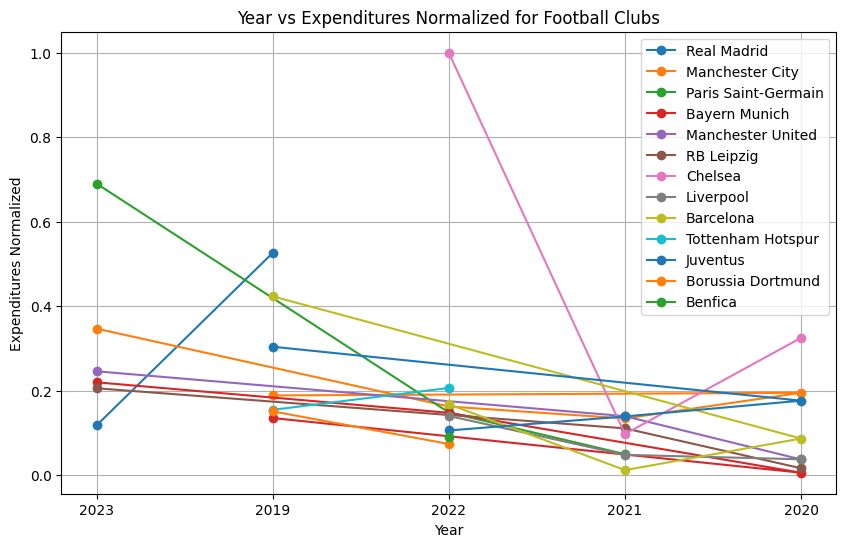

In [48]:
merged_data = merged_data.dropna(subset=['Expenditures Normalized'])

# Plot the data
plt.figure(figsize=(10, 6))
for club in merged_data['Club']:
    club_data = merged_data[merged_data['Club'] == club]
    plt.plot(club_data['Year'], club_data['Expenditures Normalized'], marker='o', label=club)

plt.xlabel('Year')
plt.ylabel('Expenditures Normalized')
plt.title('Year vs Expenditures Normalized for Football Clubs')
plt.legend()
plt.grid(True)
plt.show()

## **Model: Analysis, Hypothesis Testing, & ML**

During this phase of the Data Lifecycle, we attempt to perform various modeling techniques (such as linear regression or logistic regression) in order to obtain a predictive model of our data. This allows us to predict values for data outside of the scope of our data. For example, we can use a linear regression model to predict how temperature will changein the next few years, which is exactly what we are going to attempt to do below.


## **Interpretation: Insights Learned**

This is the part of the lifecycle where we attempt to utilize our data analysis to draw conclusions and potentially infer certain portions of our data.

Based on our observations throughout our analysis and modeling, we can safely say that:

1-

2-

Overall, we can use this data and analysis to provide insights **to the U.S decision makers, especially those who are not aware of the devastating effects of storms on U.S lives and the raise in average temperatures.**
If we could conduct further research, we would have expanded our dataset and potentially increased the area that we were researching on. We could also include all the other types of the events that we had to omit in order to be able to run this code on our laptops. Also, we can look more into detail of the event’s time to see in which months of the year are having more storms.¶
We hope that seeing a data science pipeline from data processing ➡ Exploratory Data Analysis ➡ hypothesis testing ➡ ML and analysis has given you some insight into how you can leverage data.

To learn more about a given topic check the following links:
1. [Data processing](https://shahsean.github.io/#https://medium.com/better-programming/data-engineering-101-from-batch-processing-to-streaming-54f8c0da66fb)
2. [EDA](https://shahsean.github.io/#https://towardsdatascience.com/exploratory-data-analysis-eda-a-practical-guide-and-template-for-structured-data-abfbf3ee3bd9)
3. [Hypothesis testing intuition](https://shahsean.github.io/#https://towardsdatascience.com/hypothesis-testing-the-what-why-and-how-867d382b99ca)
4. [Hypothesis testing](https://shahsean.github.io/#https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce)
5. [ML articles gold mine](https://shahsean.github.io/#https://medium.com/machine-learning-in-practice/over-200-of-the-best-machine-learning-nlp-and-python-tutorials-2018-edition-dd8cf53cb7dc)